Collaborative Filtering with Truncated SVD - Evaluation Metrics:
RMSE: 0.5554
MAE: 0.2837
R²: -3.4067

Top Recommended Tourist Attractions for You:
                            item  predicted_rating
178           O'Connell Monument          6.715492
261          St Patrick's Bridge          6.544439
269  Bundoran Adventure Park Ltd          6.321725
191     The Oscar Wilde Monument          6.290246
46     Malahide Castle & Gardens          6.225444


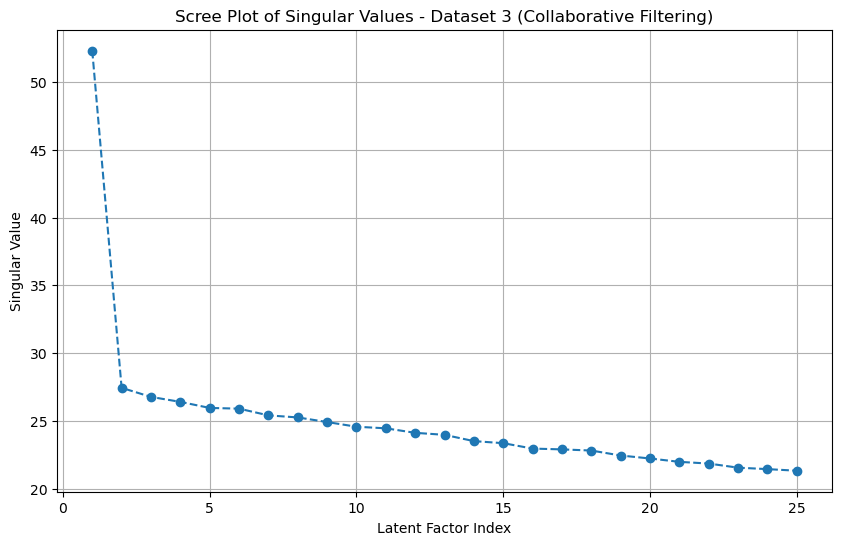

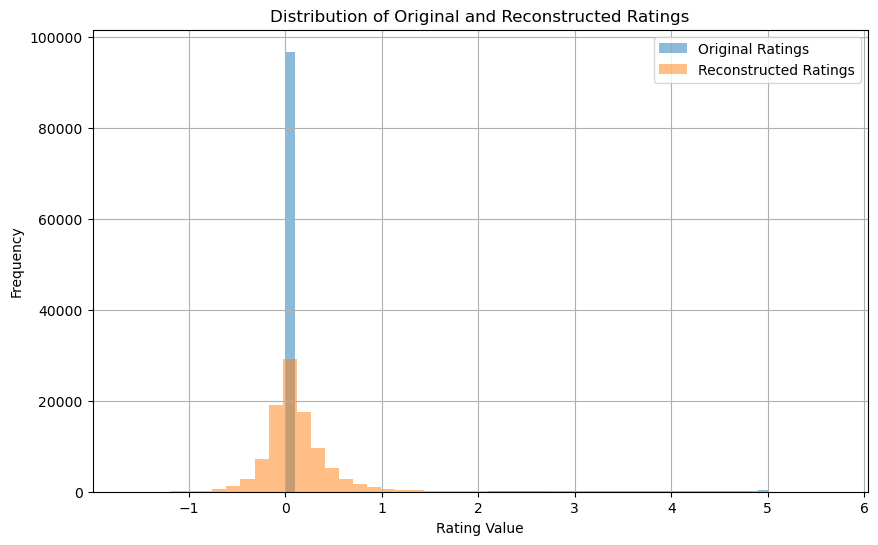

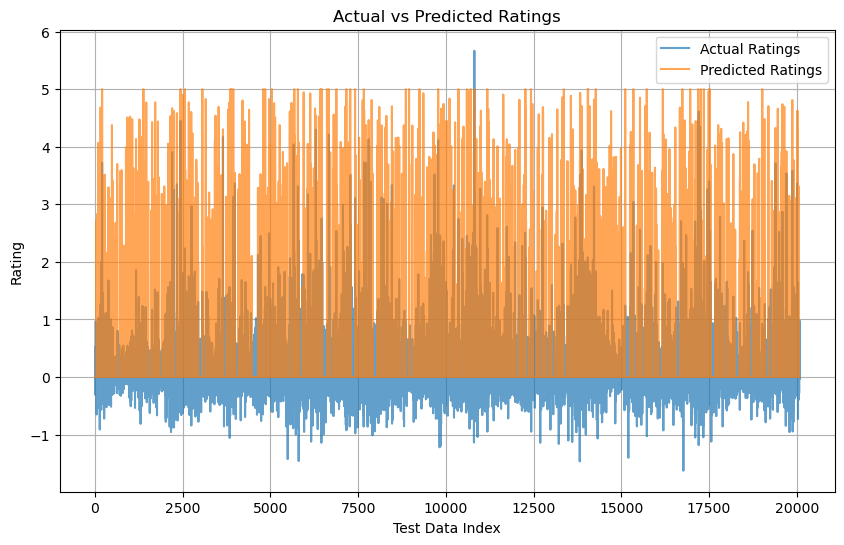

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

df = pd.read_csv("tourist_data_with_ratings_dataset3.csv")

df = df.groupby(['User_ID', 'Attraction']).agg({'User_Rating': 'mean'}).reset_index()

num_users = df['User_ID'].nunique() 
num_items = df['Attraction'].nunique() 

user_item_matrix = df.pivot(index='User_ID', columns='Attraction', values='User_Rating').fillna(0).values
user_item_matrix = csr_matrix(user_item_matrix)

n_components = 25  
svd = TruncatedSVD(n_components=n_components, random_state=42)
user_item_reduced = svd.fit_transform(user_item_matrix)

user_item_approx = svd.inverse_transform(user_item_reduced)

X_train, X_test, y_train, y_test = train_test_split(user_item_matrix.toarray(), user_item_approx, test_size=0.2, random_state=42)

y_pred = X_test

rmse_svd = np.sqrt(mean_squared_error(y_test, y_pred))
mae_svd = mean_absolute_error(y_test, y_pred)
r2_svd = r2_score(y_test, y_pred)

print("Collaborative Filtering with Truncated SVD - Evaluation Metrics:")
print(f"RMSE: {rmse_svd:.4f}")
print(f"MAE: {mae_svd:.4f}")
print(f"R²: {r2_svd:.4f}")

def recommend_items(user_preferences, df, svd, num_recommendations=5):
    user_latent = svd.transform([user_preferences])
    
    user_approx_ratings = svd.inverse_transform(user_latent).flatten()
    
    recommendations = pd.DataFrame({
        'item': df['Attraction'].unique(),
        'predicted_rating': user_approx_ratings
    })
    
    recommended_items = recommendations.sort_values(by='predicted_rating', ascending=False).head(num_recommendations)
    return recommended_items

user_preferences = [np.random.uniform(0, 5) for _ in range(num_items)]  

top_recommended_items = recommend_items(user_preferences, df, svd)

print("\nTop Recommended Tourist Attractions for You:")
print(top_recommended_items[['item', 'predicted_rating']])

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), svd.singular_values_, marker='o', linestyle='--')
plt.xlabel('Latent Factor Index')
plt.ylabel('Singular Value')
plt.title('Scree Plot of Singular Values - Dataset 3 (Collaborative Filtering)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(user_item_matrix.toarray().flatten(), bins=50, alpha=0.5, label='Original Ratings')
plt.hist(user_item_approx.flatten(), bins=50, alpha=0.5, label='Reconstructed Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.title('Distribution of Original and Reconstructed Ratings')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
x_values = range(len(y_test.flatten()))
plt.plot(x_values, y_test.flatten(), label='Actual Ratings', alpha=0.7)
plt.plot(x_values, y_pred.flatten(), label='Predicted Ratings', alpha=0.7)
plt.xlabel('Test Data Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()


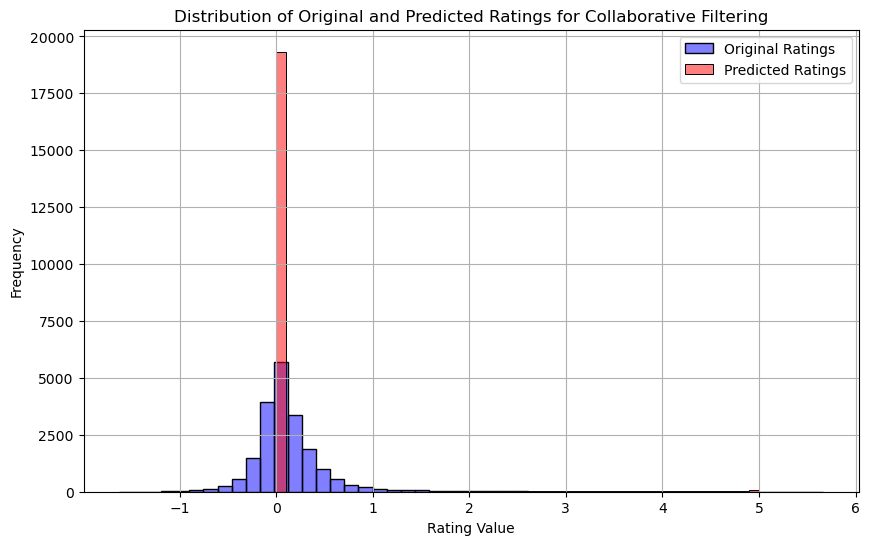

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test.flatten(), bins=50, color='blue', alpha=0.5, label='Original Ratings')
sns.histplot(y_pred.flatten(), bins=50, color='red', alpha=0.5, label='Predicted Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.title('Distribution of Original and Predicted Ratings for Collaborative Filtering')
plt.legend()
plt.grid(True)
plt.show()